É possível baixar os dados utilizados pelo link https://pla.esac.esa.int/pla-sl/data-action?MAP.MAP_OID=13485

In [7]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt

In [2]:
m = hp.read_map('COM_CMB_IQU-smica_2048_R3.00_full.fits', ('I_STOKES_INP',))

In [4]:
NSIDE = 2048
resolucao = hp.nside2resol(NSIDE, arcmin=True) / 60.0
print(f'NSIDE= {NSIDE}')
print(f'Resolucao = {resolucao:.2}')
print(f'Numero de pixeis = {hp.nside2npix(NSIDE)}')

NSIDE= 2048
Resolucao = 0.029
Numero de pixeis = 50331648


In [5]:
t, f = np.pi / 2.0, np.pi * 3 / 4.0

index = hp.ang2pix(NSIDE, t, f)
vec = hp.ang2vec(t, f)
vizinhos = hp.query_disc(NSIDE, vec=vec, radius=np.radians(1))


In [6]:
print('T - <T> (micro K) do ponto e dos pontos ao redor:')
print(m[index]*1e6)
print(len(vizinhos), m[vizinhos]*1e6)

T - <T> (micro K) do ponto e dos pontos ao redor:
248.35413205437362
3836 [-64.79788  -37.568436 -11.733218 ...  76.39249   87.84259   93.407005]


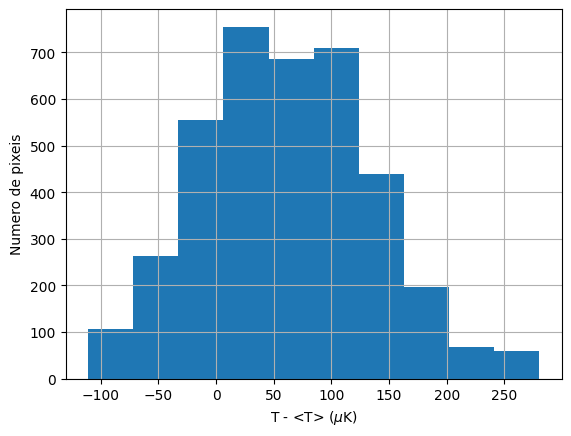

In [8]:
plt.hist(m[vizinhos]*1e6)
plt.xlabel("T - <T> ($\mu$K)")
plt.ylabel("Numero de pixeis")
plt.grid()
plt.show()